In [ ]:
#-------------------------------------------------------------
# Maestría en Economía Aplicada - UBA
# Taller de Programación
# Docente: Noelia Romero
# Grupo No XX
# Cammisi, Andrés // Porco, Matías // Pineda, David

In [ ]:
# -------------------------------------------------------------
# PARTE I: FAMILIARIZANDONOS CON LA EPH
# -------------------------------------------------------------

In [6]:
# ------------------------------------------------------------
# Carga de la base EPH 2005 (Trimestre 1)
# ------------------------------------------------------------
import pandas as pd

base_2005 = pd.read_stata('Individual_t105.dta', convert_categoricals=False)

print("Dimensiones base 2005:", base_2005.shape)
base_2005.head()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Dimensiones base 2005: (47030, 176)


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch14,ch15,ch15_cod,ch16,ch16_cod,nivel_ed,estado,cat_ocup,cat_inac,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b_cod,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04d_cod,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09a_esp,pp09b,pp09c,pp09c_esp,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b_cod,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11d_cod,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,decocur,idecocur,rdecocur,gdecocur,pdecocur,adecocur,tot_p12,p47t,decindr,idecindr,rdecindr,gdecindr,pdecindr,adecindr,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.00,1.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,017.00",1.00,1.00,80.00,4.00,1.00,1.00,2.00,0.00,4.00,2.00,02,1.00,,1.00,,3.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,,,,0.00,583.00,06,,05,05,,04,583.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,583.00,583.00,03,,03,03,,02,583.00,08,,07,08,,05,0.00,0.00,0.00,00000
1,125188,1.00,1.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,062.00",1.00,1.00,26.00,2.00,4.00,1.00,2.00,0.00,4.00,1.00,,2.00,,1.00,,4.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,20.00,0.00,1.00,1.00,1.00,1.00,1.00,2.00,5311,2.00,0.00,0.00,0.00,0.00,1.00,0.00,82113,6.00,0.00,0.00,0.00,3.00,3.00,3.00,2.00,7.00,2.00,2.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,300.00,03,,03,03,,02,0.00,450.00,05,,04,04,,03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,0.00,0.00,150.00,450.00,02,,02,02,,02,150.00,02,,02,02,,01,0.00,0.00,0.00,40020
2,125188,1.00,2.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,062.00",2.00,2.00,27.00,2.00,4.00,1.00,2.00,0.00,6.00,1.00,,1.00,,1.00,,6.00,3.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,,,,0.00,0.00,00,,00,00,,00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,450.00,02,,02,02,,02,150.00,02,,02,02,,01,0.00,0.00,0.00,00000
3,125188,1.00,3.00,0.00,"2,005.00",1.00,1.00,S,32.00,"1,062.00",3.00,2.00,-1.00,5.00,4.00,3.00,0.00,0.00,0.00,0.00,,1.00,,6.00,,7.00,4.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.

In [7]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2005 = base_2005[base_2005['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2005.shape)


Dimensiones tras filtrar Región Pampeana: (14651, 176)


In [9]:
# ------------------------------------------------------------
# Ajustar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2005.columns = base_2005.columns.str.lower()

# ------------------------------------------------------------
# Seleccionar variables de interés
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch04', 'ch06', 'ch07', 'ch08',
    'nivel_ed', 'estado', 'cat_inac', 'ipcf',
    'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph05 = base_2005[vars_interes].copy()

print("Dimensiones del subconjunto:", eph05.shape)
eph05.head()


Dimensiones del subconjunto: (14651, 18)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,pondera,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
29150,125082,1.00,1.00,28.00,2.00,4.00,2.00,1.00,0.00,280.00,377.00,3.00,0.00,72.00,0.00,2.00,4.00,0.00
29151,125082,1.00,2.00,30.00,2.00,1.00,6.00,1.00,0.00,280.00,377.00,3.00,2.00,30.00,12.00,1.00,6.00,0.00
29152,125082,1.00,1.00,4.00,5.00,1.00,7.00,4.00,5.00,280.00,377.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29153,125283,1.00,1.00,66.00,2.00,2.00,3.00,1.00,0.00,"1,075.00",283.00,3.00,0.00,0.00,0.00,2.00,2.00,0.00
29154,125283,1.00,2.00,60.00,2.00,2.00,3.00,1.00,0.00,"1,075.00",283.00,3.00,0.00,0.00,0.00,2.00,3.00,0.00


In [10]:
list(eph05.columns)


['codusu',
 'nro_hogar',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'nivel_ed',
 'estado',
 'cat_inac',
 'ipcf',
 'pondera',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

In [11]:
print("Dimensiones:", eph05.shape)
eph05.head()


Dimensiones: (14651, 18)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,pondera,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
29150,125082,1.00,1.00,28.00,2.00,4.00,2.00,1.00,0.00,280.00,377.00,3.00,0.00,72.00,0.00,2.00,4.00,0.00
29151,125082,1.00,2.00,30.00,2.00,1.00,6.00,1.00,0.00,280.00,377.00,3.00,2.00,30.00,12.00,1.00,6.00,0.00
29152,125082,1.00,1.00,4.00,5.00,1.00,7.00,4.00,5.00,280.00,377.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29153,125283,1.00,1.00,66.00,2.00,2.00,3.00,1.00,0.00,"1,075.00",283.00,3.00,0.00,0.00,0.00,2.00,2.00,0.00
29154,125283,1.00,2.00,60.00,2.00,2.00,3.00,1.00,0.00,"1,075.00",283.00,3.00,0.00,0.00,0.00,2.00,3.00,0.00


In [12]:
eph05.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14651 entries, 29150 to 43800
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codusu     14651 non-null  object 
 1   nro_hogar  14651 non-null  float64
 2   ch04       14651 non-null  float64
 3   ch06       14651 non-null  float64
 4   ch07       14651 non-null  float64
 5   ch08       14651 non-null  float64
 6   nivel_ed   14651 non-null  float64
 7   estado     14651 non-null  float64
 8   cat_inac   14651 non-null  float64
 9   ipcf       14651 non-null  float64
 10  pondera    14651 non-null  float64
 11  cat_ocup   14651 non-null  float64
 12  pp03d      14651 non-null  float64
 13  pp3e_tot   14651 non-null  float64
 14  pp3f_tot   14651 non-null  float64
 15  pp04a      14651 non-null  float64
 16  pp04c      14651 non-null  float64
 17  pp10a      14651 non-null  float64
dtypes: float64(17), object(1)
memory usage: 2.1+ MB


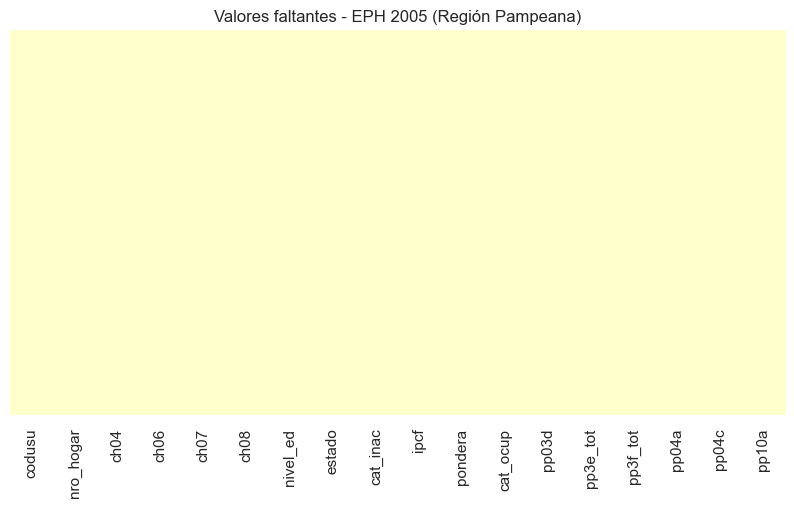

           Faltantes  % del total
codusu             0         0.00
nro_hogar          0         0.00
pp04c              0         0.00
pp04a              0         0.00
pp3f_tot           0         0.00
pp3e_tot           0         0.00
pp03d              0         0.00
cat_ocup           0         0.00
pondera            0         0.00
ipcf               0         0.00
cat_inac           0         0.00
estado             0         0.00
nivel_ed           0         0.00
ch08               0         0.00
ch07               0         0.00
ch06               0         0.00
ch04               0         0.00
pp10a              0         0.00


In [13]:
# ------------------------------------------------------------
# Diagnóstico visual de valores faltantes - EPH 2005
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(eph05.isna(), cbar=False, yticklabels=False, cmap="YlOrRd")
plt.title("Valores faltantes - EPH 2005 (Región Pampeana)")
plt.show()

# Resumen numérico complementario
faltantes = eph05.isna().sum().sort_values(ascending=False)
porcentaje = round((faltantes / len(eph05)) * 100, 2)
print(pd.DataFrame({'Faltantes': faltantes, '% del total': porcentaje}))


In [14]:
# ------------------------------------------------------------
# Copia de la base 2005
# ------------------------------------------------------------
eph05_raw = eph05.copy()


In [15]:
# -------------------------------------------------------------
# Revisión rápida de rangos y valores inusuales previo a la
# limpieza
# -------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = ["ipcf","pp3e_tot","pp3f_tot","pp03d","ch06","pondera"]
perfil_num(eph05, num_vars)


,var,n,n_na,min,p1,p50,p99,max,n_negativos,n_cero
4,ch06,14651,0,-1.00,-1.00,29.00,84.00,98.00,205,0
0,ipcf,14651,0,0.00,0.00,266.67,"1,800.00","11,300.00",0,170
5,pondera,14651,0,35.00,92.00,341.00,861.00,"2,268.00",0,0
3,pp03d,14651,0,0.00,0.00,0.00,2.00,9.00,0,14217
1,pp3e_tot,14651,0,0.00,0.00,0.00,84.00,999.00,0,9376
2,pp3f_tot,14651,0,0.00,0.00,0.00,20.00,999.00,0,14232


In [16]:
# ------------------------------------------------------------
# Limpieza final — EPH 2005
# ------------------------------------------------------------

import numpy as np
import pandas as pd

# Copiar base original
eph05_clean = eph05.copy()

# ------------------------------------------------------------
# 1. Edad (CH06): valores negativos → 0
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["ch06"] < 0, "ch06"] = 0

# ------------------------------------------------------------
# 2. Horas trabajadas (PP03D): filtrar valores absurdos
# ------------------------------------------------------------
eph05_clean.loc[(eph05_clean["pp03d"] < 0) | (eph05_clean["pp03d"] > 120), "pp03d"] = np.nan

# ------------------------------------------------------------
# 3. Ingresos laborales (PP3E_TOT y PP3F_TOT):
#     códigos 9, 99, 999, 9999, 99999 → NaN
# ------------------------------------------------------------
for v in ["pp3e_tot", "pp3f_tot"]:
    # Crear bandera de no respuesta
    eph05_clean[v + "_missing"] = eph05_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    # Reemplazar códigos de no respuesta por NaN
    eph05_clean.loc[eph05_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    # Eliminar negativos
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 4. Ingreso per cápita familiar (IPCF): eliminar negativos
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["ipcf"] < 0, "ipcf"] = np.nan

# ------------------------------------------------------------
# 5. Ponderador (PONDERA): debe ser positivo
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["pondera"] <= 0, "pondera"] = np.nan

# ------------------------------------------------------------
# 6. Resumen de limpieza
# ------------------------------------------------------------
resumen_limpieza = pd.DataFrame({
    "NAs antes": eph05.isna().sum(),
    "NAs después": eph05_clean.isna().sum(),
    "Nuevos NAs": eph05_clean.isna().sum() - eph05.isna().sum()
})
print("✅ Limpieza completada.\n")
display(resumen_limpieza)


✅ Limpieza completada.



,NAs antes,NAs después,Nuevos NAs
cat_inac,0.00,0,0.00
cat_ocup,0.00,0,0.00
ch04,0.00,0,0.00
ch06,0.00,0,0.00
ch07,0.00,0,0.00
ch08,0.00,0,0.00
codusu,0.00,0,0.00
estado,0.00,0,0.00
ipcf,0.00,0,0.00
nivel_ed,0.00,0,0.00


In [17]:
# ------------------------------------------------------------
# Guardar base limpia EPH - 05
# ------------------------------------------------------------

ruta_salida_2005 = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph05_clean.csv'

eph05_clean.to_csv(ruta_salida_2005, index=False)
print(f"✅ Base 2005 limpia guardada en:\n{ruta_salida_2005}")


✅ Base 2005 limpia guardada en:
/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph05_clean.csv


In [1]:
# ------------------------------------------------------------
# Instalar dependencia para leer archivos .xlsx
# ------------------------------------------------------------
!pip install openpyxl

In [3]:
# ------------------------------------------------------------
# Ajustar directorio
# ------------------------------------------------------------

import os

# Cambiar al directorio correcto
os.chdir('/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1')

# Confirmar que el cambio fue exitoso
print("✅ Nuevo directorio de trabajo:", os.getcwd())



✅ Nuevo directorio de trabajo: /Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1


In [5]:
# ------------------------------------------------------------
# Cargar base EPH 2025 (Trimestre 1)
# ------------------------------------------------------------

import pandas as pd

base_2025 = pd.read_excel('usu_individual_T125.xlsx')

print("Dimensiones base 2025:", base_2025.shape)
base_2025.head()


Dimensiones base 2025: (45425, 235)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,2,1,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
1,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,3,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
2,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,4,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
3,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,5,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
4,TQRMNOUPQHLOLOCDEFKID00851757,2025,1,1,1,1,43,S,4,1294,...,0,0,0,0,3.0,3.0,3.0,NaN,3.0,3.0


In [6]:
# ------------------------------------------------------------
# Normalizar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2025.columns = base_2025.columns.str.lower()

print("✅ Nombres de columnas convertidos a minúsculas.")
print(base_2025.columns[:15])  # muestra las primeras 15 para confirmar


✅ Nombres de columnas convertidos a minúsculas.
Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05',
       'ch06', 'ch07'],
      dtype='object')


In [7]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2025 = base_2025[base_2025['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2025.shape)


Dimensiones tras filtrar Región Pampeana: (13803, 235)


In [9]:
# ------------------------------------------------------------
# Seleccionar variables de interés en base EPH 2025
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch04', 'ch06', 'ch07', 'ch08',
    'nivel_ed', 'estado', 'cat_inac', 'ipcf',
    'pondera', 'pondih', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph25 = base_2025[vars_interes].copy()

print("Dimensiones del subconjunto:", eph25.shape)
eph25.head()

Dimensiones del subconjunto: (13803, 19)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,pondera,pondih,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
0,TQRMNOVQVHJOLOCDEFKID00875778,1,2,25,1,4.0,4,1,0,205600.0,927,1076,3,0.0,24.0,0.0,2.0,3.0,NaN
1,TQRMNOVQVHJOLOCDEFKID00875778,1,2,7,5,4.0,1,4,3,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
2,TQRMNOVQVHJOLOCDEFKID00875778,1,1,4,5,4.0,7,4,5,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
3,TQRMNOVQVHJOLOCDEFKID00875778,1,1,-1,5,4.0,7,4,5,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
4,TQRMNOUPQHLOLOCDEFKID00851757,1,2,29,5,4.0,5,1,0,230000.0,1294,1531,2,0.0,70.0,0.0,2.0,1.0,NaN


In [10]:
list(eph25.columns)

['codusu',
 'nro_hogar',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'nivel_ed',
 'estado',
 'cat_inac',
 'ipcf',
 'pondera',
 'pondih',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

In [11]:
print("Dimensiones:", eph25.shape)
eph25.head()

Dimensiones: (13803, 19)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,pondera,pondih,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
0,TQRMNOVQVHJOLOCDEFKID00875778,1,2,25,1,4.0,4,1,0,205600.0,927,1076,3,0.0,24.0,0.0,2.0,3.0,NaN
1,TQRMNOVQVHJOLOCDEFKID00875778,1,2,7,5,4.0,1,4,3,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
2,TQRMNOVQVHJOLOCDEFKID00875778,1,1,4,5,4.0,7,4,5,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
3,TQRMNOVQVHJOLOCDEFKID00875778,1,1,-1,5,4.0,7,4,5,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
4,TQRMNOUPQHLOLOCDEFKID00851757,1,2,29,5,4.0,5,1,0,230000.0,1294,1531,2,0.0,70.0,0.0,2.0,1.0,NaN


In [12]:
eph25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13803 entries, 0 to 45424
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codusu     13803 non-null  object 
 1   nro_hogar  13803 non-null  int64  
 2   ch04       13803 non-null  int64  
 3   ch06       13803 non-null  int64  
 4   ch07       13803 non-null  int64  
 5   ch08       13803 non-null  float64
 6   nivel_ed   13803 non-null  int64  
 7   estado     13803 non-null  int64  
 8   cat_inac   13803 non-null  int64  
 9   ipcf       13803 non-null  float64
 10  pondera    13803 non-null  int64  
 11  pondih     13803 non-null  int64  
 12  cat_ocup   13803 non-null  int64  
 13  pp03d      6004 non-null   float64
 14  pp3e_tot   6004 non-null   float64
 15  pp3f_tot   6004 non-null   float64
 16  pp04a      6004 non-null   float64
 17  pp04c      6004 non-null   float64
 18  pp10a      467 non-null    float64
dtypes: float64(8), int64(10), object(1)
memory usage: 2

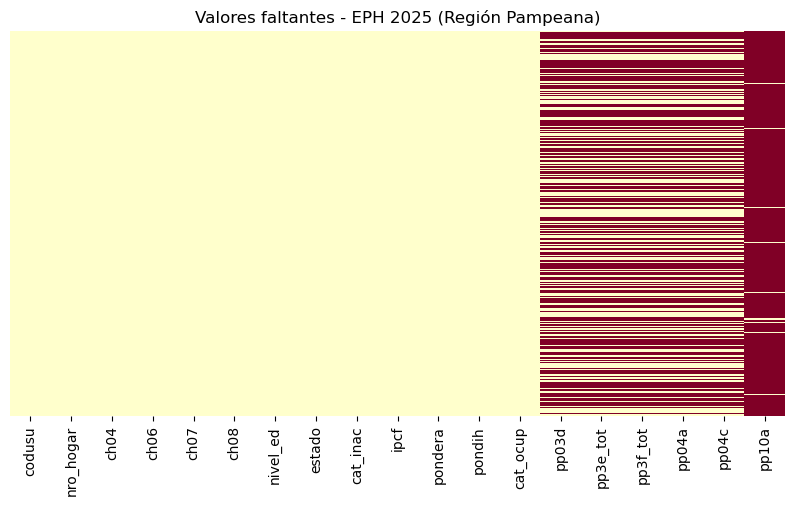

           Faltantes  % del total
pp10a          13336        96.62
pp04c           7799        56.50
pp04a           7799        56.50
pp3f_tot        7799        56.50
pp3e_tot        7799        56.50
pp03d           7799        56.50
pondera            0         0.00
cat_ocup           0         0.00
pondih             0         0.00
codusu             0         0.00
nro_hogar          0         0.00
cat_inac           0         0.00
estado             0         0.00
nivel_ed           0         0.00
ch08               0         0.00
ch07               0         0.00
ch06               0         0.00
ch04               0         0.00
ipcf               0         0.00


In [13]:
# ------------------------------------------------------------
# Diagnóstico visual de valores faltantes - EPH 2025
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(eph25.isna(), cbar=False, yticklabels=False, cmap="YlOrRd")
plt.title("Valores faltantes - EPH 2025 (Región Pampeana)")
plt.show()

# Resumen numérico complementario
faltantes = eph25.isna().sum().sort_values(ascending=False)
porcentaje = round((faltantes / len(eph25)) * 100, 2)
print(pd.DataFrame({'Faltantes': faltantes, '% del total': porcentaje}))

In [14]:
# ------------------------------------------------------------
# Copia de la base 2025
# ------------------------------------------------------------
eph25_raw = eph25.copy()

In [15]:
# -------------------------------------------------------------
# Revisión rápida de rangos y valores inusuales previo a la
# limpieza - EPH 2025
# -------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = ["ipcf","pp3e_tot","pp3f_tot","pp03d","ch06","pondera", "pondih", "pp04a", "pp04c", "pp10a"]
perfil_num(eph25, num_vars)

,var,n,n_na,min,p1,p50,p99,max,n_negativos,n_cero
4,ch06,13803,0,-1.0,1.0,35.0,86.00,102.0,86,0
0,ipcf,13803,0,0.0,0.0,240000.0,2124900.00,8600000.0,0,4463
5,pondera,13803,0,21.0,74.0,330.0,1662.00,2936.0,0,0
6,pondih,13803,0,0.0,0.0,206.0,2501.76,9295.0,0,4414
3,pp03d,13803,7799,0.0,0.0,0.0,3.00,8.0,0,5420
7,pp04a,13803,7799,1.0,1.0,2.0,3.00,3.0,0,0
8,pp04c,13803,7799,0.0,0.0,6.0,99.00,99.0,0,415
9,pp10a,13803,13336,1.0,1.0,3.0,5.00,5.0,0,0
1,pp3e_tot,13803,7799,0.0,0.0,36.0,84.00,168.0,0,449
2,pp3f_tot,13803,7799,0.0,0.0,0.0,25.00,56.0,0,5428


In [16]:
# ------------------------------------------------------------
# Limpieza final — EPH 2025
# ------------------------------------------------------------

import numpy as np
import pandas as pd

# Copiar base original
eph25_clean = eph25.copy()

# ------------------------------------------------------------
# 1. Edad (CH06): valores negativos → 0
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["ch06"] < 0, "ch06"] = 0

# ------------------------------------------------------------
# 2. Horas trabajadas (PP03D): filtrar valores absurdos
# ------------------------------------------------------------
eph25_clean.loc[(eph25_clean["pp03d"] < 0) | (eph25_clean["pp03d"] > 120), "pp03d"] = np.nan

# ------------------------------------------------------------
# 3. Ingresos laborales (PP3E_TOT y PP3F_TOT):
#    códigos 9, 99, 999, 9999, 99999 → NaN; negativos → NaN
# ------------------------------------------------------------
for v in ["pp3e_tot", "pp3f_tot"]:
    # Crear bandera de no respuesta (antes de recodificar)
    eph25_clean[v + "_missing"] = eph25_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    # Reemplazar códigos de no respuesta por NaN
    eph25_clean.loc[eph25_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    # Eliminar negativos
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 4. Ingreso per cápita familiar (IPCF): eliminar negativos
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["ipcf"] < 0, "ipcf"] = np.nan

# ------------------------------------------------------------
# 5. Categoría ocupacional (PP04C): 99 → NaN (No sabe/No responde)
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["pp04c"] == 99, "pp04c"] = np.nan

# ------------------------------------------------------------
# 6. Ponderadores:
#    PONDERA (general) y PONDIH (ingresos/hogares) deben ser > 0
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["pondera"] <= 0, "pondera"] = np.nan
eph25_clean.loc[eph25_clean["pondih"]  <= 0, "pondih"]  = np.nan

# ------------------------------------------------------------
# 7. Resumen de limpieza
# ------------------------------------------------------------
resumen_limpieza_25 = pd.DataFrame({
    "NAs antes": eph25.isna().sum(),
    "NAs después": eph25_clean.isna().sum(),
    "Nuevos NAs": eph25_clean.isna().sum() - eph25.isna().sum()
})
print("✅ Limpieza 2025 completada.\n")
display(resumen_limpieza_25)


✅ Limpieza 2025 completada.



,NAs antes,NAs después,Nuevos NAs
cat_inac,0.0,0,0.0
cat_ocup,0.0,0,0.0
ch04,0.0,0,0.0
ch06,0.0,0,0.0
ch07,0.0,0,0.0
ch08,0.0,0,0.0
codusu,0.0,0,0.0
estado,0.0,0,0.0
ipcf,0.0,0,0.0
nivel_ed,0.0,0,0.0


In [17]:
# ------------------------------------------------------------
# Guardar base limpia - EPH 2025
# ------------------------------------------------------------
ruta_salida_2025 = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph25_clean.csv'

eph25_clean.to_csv(ruta_salida_2025, index=False, encoding='utf-8')
print(f"✅ Base 2025 limpia guardada en:\n{ruta_salida_2025}")

✅ Base 2025 limpia guardada en:
/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph25_clean.csv


In [18]:
# ------------------------------------------------------------
# Unión de bases EPH 2005 y EPH 2025
# ------------------------------------------------------------

import pandas as pd

# ------------------------------------------------------------
# 1. Cargar las bases limpias desde disco
# ------------------------------------------------------------
ruta_2005 = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph05_clean.csv'
ruta_2025 = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph25_clean.csv'

eph05_clean = pd.read_csv(ruta_2005)
eph25_clean = pd.read_csv(ruta_2025)

# ------------------------------------------------------------
# 2. Agregar una columna de año para identificar origen
# ------------------------------------------------------------
eph05_clean["anio"] = 2005
eph25_clean["anio"] = 2025

# ------------------------------------------------------------
# 3. Unir verticalmente las dos bases
# ------------------------------------------------------------
eph_panel = pd.concat([eph05_clean, eph25_clean], ignore_index=True)

# ------------------------------------------------------------
# 4. Confirmar dimensiones y estructura
# ------------------------------------------------------------
print("✅ Bases unidas correctamente.\n")
print("Dimensiones de la base final:", eph_panel.shape)
print("\nDistribución por año:")
print(eph_panel["anio"].value_counts())

# ------------------------------------------------------------
# 5. Guardar base combinada
# ------------------------------------------------------------
ruta_panel = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph_panel_05_25.csv'
eph_panel.to_csv(ruta_panel, index=False, encoding='utf-8')
print(f"\n✅ Base combinada guardada en:\n{ruta_panel}")


✅ Bases unidas correctamente.

Dimensiones de la base final: (28454, 22)

Distribución por año:
anio
2005    14651
2025    13803
Name: count, dtype: int64

✅ Base combinada guardada en:
/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph_panel_05_25.csv


In [ ]:
# -------------------------------------------------------------
# PARTE II: PRIMER ANÁLISIS EXPLORATORIO
# -------------------------------------------------------------

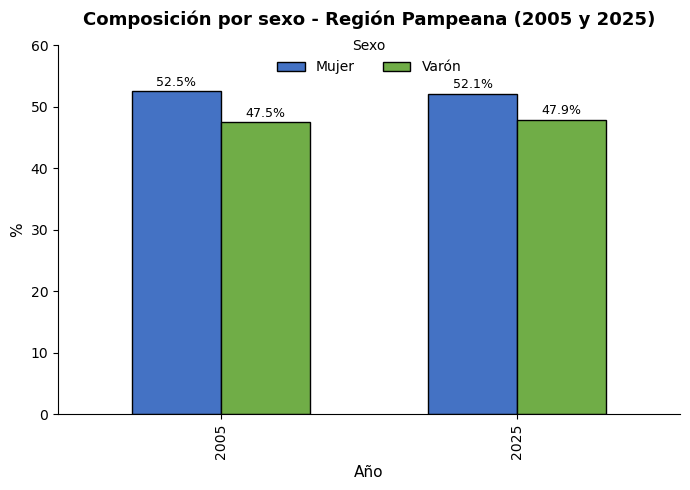

In [24]:
# ------------------------------------------------------------
# Gráfico de barras por sexo
# -----------------------------------------------------------

import matplotlib.pyplot as plt

plt.style.use('default')
fig, ax = plt.subplots(figsize=(7,5))

# Colores: mujer (azul), varón (verde)
colores = ['#4472C4', '#70AD47']

# Gráfico de barras
comp_sexo.plot(kind='bar', ax=ax, color=colores, width=0.6, edgecolor='black')

# Título y etiquetas
ax.set_title('Composición por sexo - Región Pampeana (2005 y 2025)', 
             fontsize=13, weight='bold', pad=15)
ax.set_xlabel('Año', fontsize=11)
ax.set_ylabel('%', fontsize=11)

# Leyenda centrada entre título y gráfico
ax.legend(
    title='Sexo', fontsize=10, title_fontsize=10,
    loc='upper center', bbox_to_anchor=(0.5, 1.05),
    ncol=2, frameon=False
)

# Eliminar rejillas y bordes innecesarios
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Limitar el eje Y hasta 60% para mejor distribución
ax.set_ylim(0, 60)

# Etiquetas con porcentaje encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()






In [ ]:
# ------------------------------------------------------------
# Matriz de correlación
# -----------------------------------------------------------